In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding as LLE, TSNE
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def data_preprocessing(X_raw,y_raw):
    X_raw = X_raw.reshape(-1,X_raw.shape[1]*X_raw.shape[2])
    y_label = np.where(y_raw == 1)[1]
    y_label_8 = np.where(y_label==8)[0]
    y_label_0 = np.where(y_label==0)[0]
    
    X_8 = X_raw[y_label_8,:]
    y_8 = np.ones((X_8.shape[0],1))
    X_0 = X_raw[y_label_0,:]
    y_0 = np.zeros((X_0.shape[0],1))
    
    data_8 = np.concatenate((X_8,y_8),axis=1)
    data_0 = np.concatenate((X_0,y_0),axis=1)
    data = np.concatenate((data_8,data_0),axis=0)
    np.random.shuffle(data)
    
    X = data[:,:-1]
    y = data[:,-1]
    
    return X,y

In [3]:
def dimension_reduction(method, X_train):
    if method =='PCA':
        model = PCA(n_components=2,random_state=18)
    elif method == 'Isomap':
        model = Isomap(n_components=2)
    elif method == 'LLE':
        model = LLE(n_components=2,random_state=18)
    elif method == 'tSNE':
        model = TSNE(n_components=2,random_state=18)
    else:
        raise ValueError('No such methods found.')
    
    X_train_new = model.fit_transform(X_train)

    X_train_new_8 = X_train_new[(np.where(y_train==1)[0]),:]
    X_train_new_0 = X_train_new[(np.where(y_train==0)[0]),:]

    plt.figure(figsize=(16,12))
    plt.scatter(X_train_new_8[:,0],X_train_new_8[:,1],c='red')
    plt.scatter(X_train_new_0[:,0],X_train_new_0[:,1],c='blue')
    plt.show()

In [4]:
path='HomeworkData/'
data = np.load(path+'mnist.npz')
X_train_raw = data['X_train']
y_train_raw = data['y_train']
X_test_raw = data['X_test']
y_test_raw = data['y_test']

X_train, y_train = data_preprocessing(X_train_raw,y_train_raw)
X_test, y_test = data_preprocessing(X_test_raw,y_test_raw)

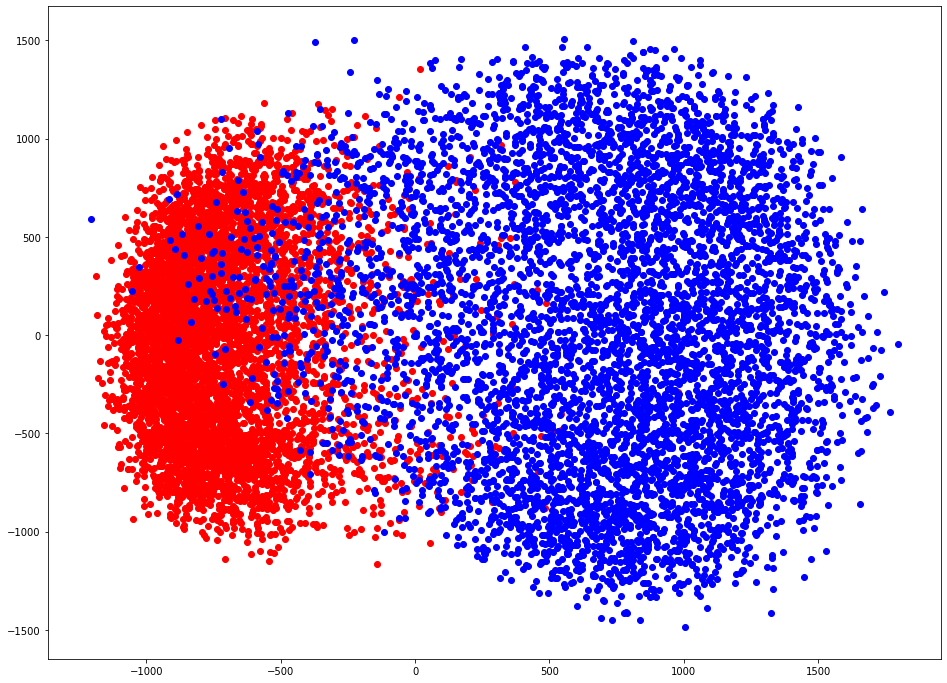

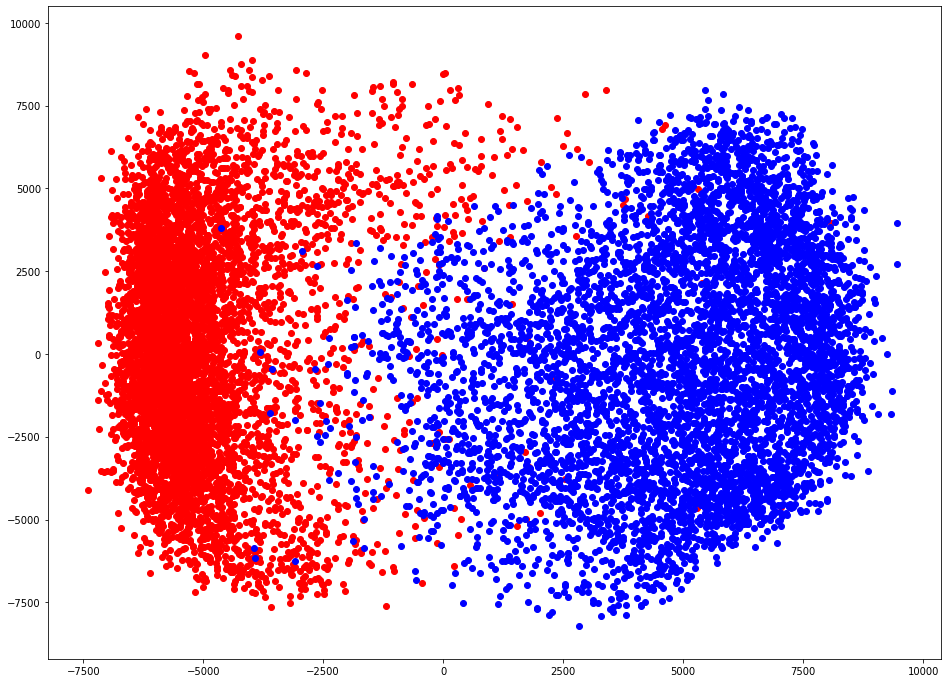

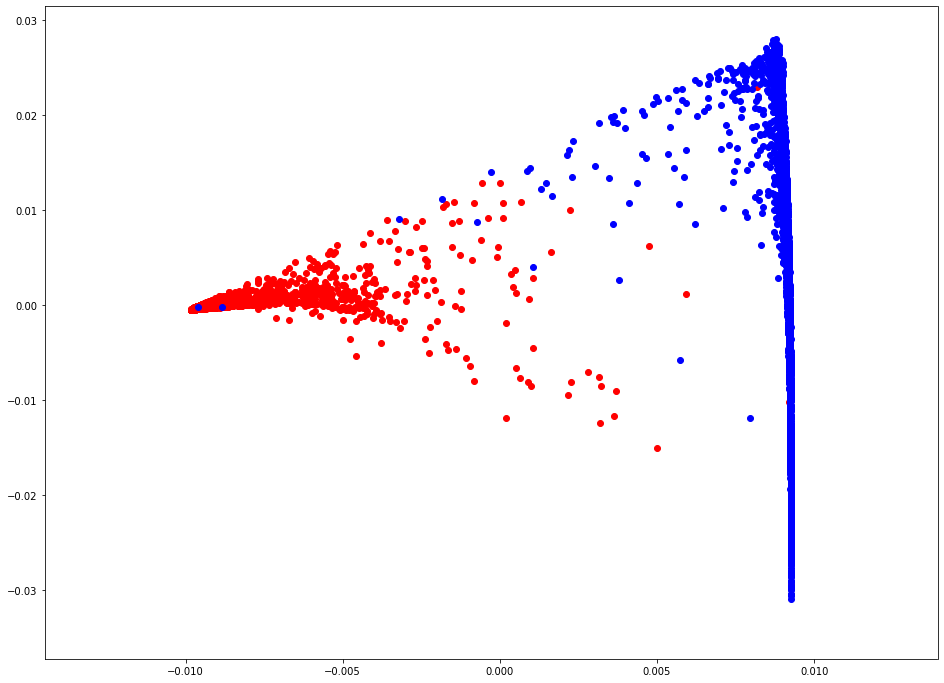

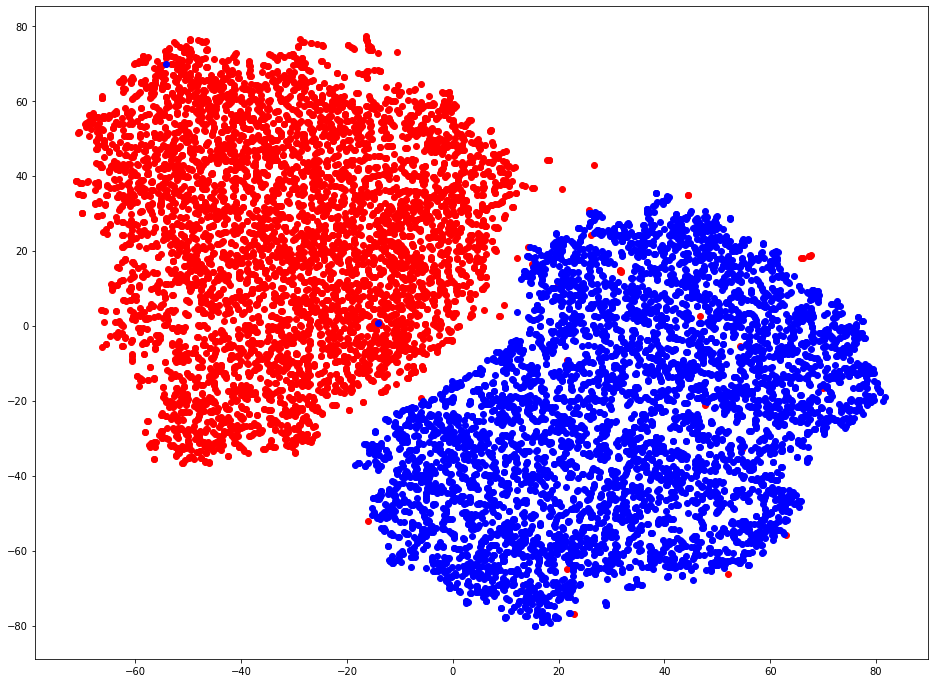

In [5]:
dimension_reduction('PCA', X_train)
dimension_reduction('Isomap', X_train)
dimension_reduction('LLE', X_train)
dimension_reduction('tSNE', X_train)

In [9]:
def XGB_PCA(n_components, X_train, y_train, X_test, y_test):
    if n_components != 0:
        length = X_train.shape[0]
        X = np.concatenate((X_train,X_test),axis=0)
        X_new = PCA(n_components=n_components,random_state=18).fit_transform(X)
        X_train = X_new[:length,:]
        X_test = X_new[length:,]
    
    model_xgb = xgb.XGBClassifier(n_estimators=5, objective='binary:logistic', booster='gbtree', random_state=19)
    model_xgb.fit(X_train,y_train)
    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc

In [10]:
acc_0 = XGB_PCA(0, X_train, y_train, X_test, y_test)
acc_1 = XGB_PCA(1, X_train, y_train, X_test, y_test)
acc_10 = XGB_PCA(10, X_train, y_train, X_test, y_test)
acc_20 = XGB_PCA(20, X_train, y_train, X_test, y_test)
acc_50 = XGB_PCA(50, X_train, y_train, X_test, y_test)
acc_100 = XGB_PCA(100, X_train, y_train, X_test, y_test)
acc_300 = XGB_PCA(300, X_train, y_train, X_test, y_test)

In [11]:
print('acc_0:',round(acc_0,4))
print('acc_1:',round(acc_1,4))
print('acc_10:',round(acc_10,4))
print('acc_20:',round(acc_20,4))
print('acc_50:',round(acc_50,4))
print('acc_100:',round(acc_100,4))
print('acc_300:',round(acc_300,4))

acc_0: 0.9903
acc_1: 0.955
acc_10: 0.9852
acc_20: 0.9852
acc_50: 0.9826
acc_100: 0.9836
acc_300: 0.9826
